# 第5章 多元线性回归

## 5.1 二元线性回归

模型:Cobb-Douglas生产函数

$\ln y_i=\ln \alpha +\beta\ln k_i +\gamma \ln l_i + \epsilon_i$

In [2]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

CD = pd.read_stata('../2_Data/Data-2e/cobb_douglas.dta')
CD.head()

,year,k,l,y,lnk,lnl,lny
0,1899,100,100,100,4.605170,4.605170,4.605170
1,1900,107,105,101,4.672829,4.653960,4.615120
2,1901,114,110,112,4.736198,4.700480,4.718499
3,1902,122,118,122,4.804021,4.770685,4.804021
4,1903,131,123,124,4.875197,4.812184,4.820282


In [3]:
# 定义变量

X = CD[['lnk','lnl']]
y = CD['lny']
X = sm.add_constant(X)

# 建立回归模型
model = sm.OLS(y,X)
results = model.fit().summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lny   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     236.1
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           4.04e-15
Time:                        00:52:16   Log-Likelihood:                 35.826
No. Observations:                  24   AIC:                            -65.65
Df Residuals:                      21   BIC:                            -62.12
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1773      0.434     -0.408      0.687      -1.080       0.726
lnk            0.2331      0.064      3.668      0.001       0.101       0.365
lnl            0.8073      0.145      5.565      0.000       0.506       1.109
==============================================================================
Omnibus:                        2.133   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.361
Skew:                           0.583   Prob(JB):                        0.506
Kurtosis:                       2.992   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# sm.graphics.plot_partregress(endog='lny', 
#                              exog_i='lnk',
#                              exog_others=['lnl'],
#                              data=CD, 
#                              obs_labels=False # 不显示样本点的标签
#                              )

## 5.4 OLS的几何解释

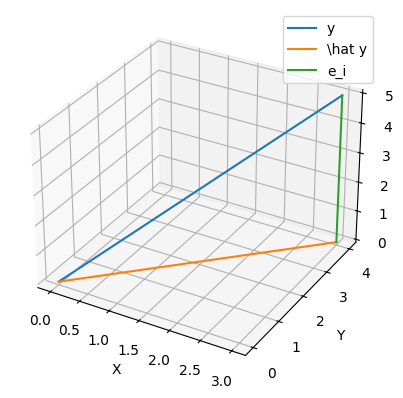

In [5]:
#借助kimi实现的代码

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义点a和点b的坐标
a = np.array([0, 0, 0])
b = np.array([3, 4, 5])

# 创建3D图形和坐标轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制直线y
ax.plot3D([a[0], b[0]], [a[1], b[1]], [a[2], b[2]], label='y')

# 计算直线在xy平面上的投影点
# 投影点的z坐标为0
projected_point = (b[0], b[1], 0)

# 绘制投影线$\hat y$
ax.plot3D([a[0], projected_point[0]], [a[1], projected_point[1]], [a[2], projected_point[2]], label='\hat y')

# 计算点b到投影点的垂线e
# 由于我们已经在xy平面上，垂线e的x和y坐标与投影点相同，z坐标与点b相同
e_point = (projected_point[0], projected_point[1], b[2])

# 绘制垂线e
ax.plot3D([projected_point[0], e_point[0]], [projected_point[1], e_point[1]], [projected_point[2], e_point[2]], label='e_i')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图例
ax.legend()

# 显示图形
plt.show()

## 5.12 多元线性回归的python命令及实例

数据：grilic.dta
对以下方程进行多元线性回归：$$\ln{w}=\beta_1+\beta_2s+\beta_3expr+\beta_4tenure+\beta_5smsa+\beta_6rns+\epsilon$$

In [6]:
import pandas as pd
import statsmodels.api as sm

grilic = pd.read_stata('../2_Data/Data-2e/grilic.dta')
grilic.head()

,rns,mrt,smsa,med,iq,kww,age,s,expr,tenure,lnw
0,0,0,1,8,93,35,19,12,0.462,0,5.900
1,0,0,1,14,119,41,23,16,0.000,2,5.438
2,0,0,1,14,108,46,20,14,0.423,1,5.710
3,0,0,1,12,96,32,18,12,0.333,1,5.481
4,0,1,1,6,74,27,26,9,9.013,3,5.927


In [7]:
X=grilic[['s','expr','tenure','smsa','rns']]
y = grilic['lnw']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     81.75
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.52e-68
Time:                        00:52:16   Log-Likelihood:                -268.96
No. Observations:                 758   AIC:                             549.9
Df Residuals:                     752   BIC:                             577.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1037      0.085     48.223      0.0

In [10]:
# 查看回归系数的协方差矩阵
print(results.cov_params())

           const             s          expr        tenure      smsa  \
const   0.007242 -4.656708e-04 -1.677820e-04 -8.646432e-05 -0.000387   
s      -0.000466  3.420855e-05  8.660311e-06 -3.997250e-08 -0.000014   
expr   -0.000168  8.660311e-06  4.002835e-05 -1.106982e-05  0.000003   
tenure -0.000086 -3.997250e-08 -1.106982e-05  5.994430e-05 -0.000008   
smsa   -0.000387 -1.440121e-05  3.260602e-06 -7.819468e-06  0.000789   
rns    -0.000440  8.523976e-06  7.334432e-07  7.259141e-06  0.000125   

                 rns  
const  -4.399747e-04  
s       8.523976e-06  
expr    7.334432e-07  
tenure  7.259141e-06  
smsa    1.248584e-04  
rns     8.292835e-04  


In [11]:
# 进行无常数项的回归
X_noconst=grilic[['s','expr','tenure','smsa','rns']]
y = grilic['lnw']

model = sm.OLS(y,X_noconst)
results = model.fit()
print(results.summary()) #

                                 OLS Regression Results                                
Dep. Variable:                    lnw   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              9903.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):                        0.00
Time:                        01:12:59   Log-Likelihood:                         -803.02
No. Observations:                 758   AIC:                                      1616.
Df Residuals:                     753   BIC:                                      1639.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [26]:
# 只对南方居民的子样本进行回归，可使用虚拟变量rns,即：grilic['rns'] == 1
grilic_south = grilic[grilic['rns'] == 1]

X=grilic_south[['s','expr','tenure','smsa','rns']]
y = grilic_south['lnw']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     36.07
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.17e-22
Time:                        01:38:44   Log-Likelihood:                -72.353
No. Observations:                 204   AIC:                             154.7
Df Residuals:                     199   BIC:                             171.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
s              0.1198      0.011     10.589      0.0

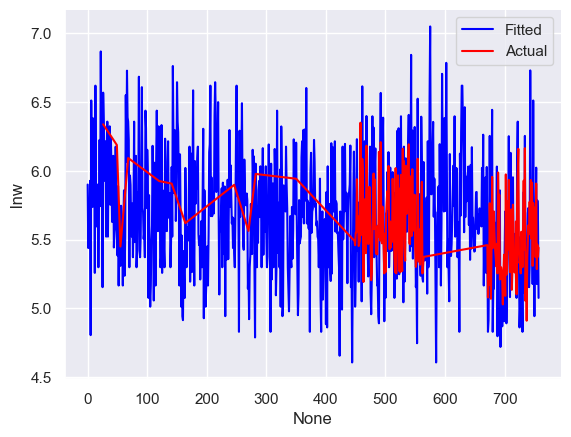

In [38]:
# 计算被解释变量的拟合值
df = pd.DataFrame(grilic['lnw'])
df['lnw1']=results.predict(X)

# 画两条曲线，展示拟合值与实际值的关系图
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(x=df.index, y='lnw', data=df, color='blue',label='Fitted')
sns.lineplot(x=df.index, y='lnw1', data=df, color='red',label='Actual')
sns.despine()



In [15]:
# 只对北方居民的子样本进行回归，可使用虚拟变量rns,即：grilic['rns'] == 0
grilic_north = grilic[grilic['rns'] == 0]

X=grilic_north[['s','expr','tenure','smsa','rns']]
y = grilic_north['lnw']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     62.45
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.70e-43
Time:                        01:21:20   Log-Likelihood:                -191.70
No. Observations:                 554   AIC:                             393.4
Df Residuals:                     549   BIC:                             415.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2140      0.100     42.318      0.0

e:\Eco-stats\eco-stats\.venv\lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [16]:
# 只对中学以上（s>=12）的子样本进行回归，
grilic_mds = grilic[grilic['s'] >= 12]

X=grilic_mds[['s','expr','tenure','smsa','rns']]
y = grilic_mds['lnw']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     69.81
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           8.21e-59
Time:                        01:23:52   Log-Likelihood:                -240.54
No. Observations:                 679   AIC:                             493.1
Df Residuals:                     673   BIC:                             520.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0153      0.098     40.906      0.0

In [20]:
# 只对中学以上（s>=12）的南方居民子样本进行回归，
grilic_mds_south = grilic[(grilic['s'] >= 12) & (grilic['rns'] == 1)]
# grilic_mds_south = grilic[(grilic['s'] >= 12) and (grilic['rns'] == 1)]

X=grilic_mds_south[['s','expr','tenure','smsa','rns']]
y = grilic_mds_south['lnw']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    lnw   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     32.17
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           6.29e-20
Time:                        01:32:36   Log-Likelihood:                -59.681
No. Observations:                 174   AIC:                             129.4
Df Residuals:                     169   BIC:                             145.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
s              0.1269      0.013      9.626      0.0